<small>
Copyright (c) 2017 Andrew Glassner

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>



# Deep Learning From Basics to Practice
## by Andrew Glassner, https://dlbasics.com, http://glassner.com
------
## Chapter 23: Keras
### Notebook 4: Training and running the model

This notebook is provided as a “behind-the-scenes” look at code used to make some of the figures in this chapter. It is still in the hacked-together form used to develop the figures, and is only lightly commented.

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
import numpy as np

import matplotlib.pyplot as plt

from keras import backend as keras_backend
keras_backend.set_image_data_format('channels_last')

Using TensorFlow backend.


In [2]:
# Make a File_Helper for saving and loading files.

save_files = True

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
from DLBasics_Utilities import File_Helper
file_helper = File_Helper(save_files)

In [3]:
random_seed = 42
np.random.seed(random_seed)

# load MNIST data and save sizes
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_height = X_train.shape[1]
image_width = X_train.shape[2]
number_of_pixels = image_height * image_width

# convert to floating-point
X_train = keras_backend.cast_to_floatx(X_train)
X_test = keras_backend.cast_to_floatx(X_test)

# scale data to range [0, 1]
X_train /= 255.0
X_test /= 255.0

# save the original y_train and y_test 
original_y_train = y_train
original_y_test = y_test

# replace label data with one-hot encoded versions
number_of_classes = 1 + max(np.append(y_train, y_test))
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

# reshape samples to 2D grid, one line per image
X_train = X_train.reshape([X_train.shape[0], number_of_pixels])
X_test = X_test.reshape([X_test.shape[0], number_of_pixels])

def make_one_hidden_layer_model():
    model = Sequential()
    model.add(Dense(number_of_pixels, activation='relu',
                    input_shape=[number_of_pixels]))
    model.add(Dense(number_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
    return model

# make the model
one_hidden_layer_model = make_one_hidden_layer_model()

# call fit() to train the model, and save the history
one_hidden_layer_history = one_hidden_layer_model.fit(X_train, y_train, 
    validation_data=(X_test, y_test), epochs=3, batch_size=256, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
3s - loss: 0.3044 - acc: 0.9141 - val_loss: 0.1645 - val_acc: 0.9521
Epoch 2/3
3s - loss: 0.1240 - acc: 0.9645 - val_loss: 0.1038 - val_acc: 0.9700
Epoch 3/3
3s - loss: 0.0814 - acc: 0.9761 - val_loss: 0.0816 - val_acc: 0.9754


In [4]:
# Try it again with 20 epochs. We'll re-build the
# model so we're starting with a fresh slate. We'll
# also re-seed the random number generator for repeatability.

np.random.seed(random_seed)

# make the model
one_hidden_layer_model = make_one_hidden_layer_model()

weights_filename = "NB4-one-hidden-layer-model"
if not file_helper.load_model_weights(one_hidden_layer_model, weights_filename):
    one_hidden_layer_model.fit(X_train, y_train, 
                               validation_data=(X_test, y_test), 
                               epochs=20, batch_size=256, verbose=2)
    file_helper.save_model_weights(one_hidden_layer_model, weights_filename)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
3s - loss: 0.3044 - acc: 0.9141 - val_loss: 0.1640 - val_acc: 0.9522
Epoch 2/20
3s - loss: 0.1238 - acc: 0.9646 - val_loss: 0.1041 - val_acc: 0.9694
Epoch 3/20
3s - loss: 0.0812 - acc: 0.9761 - val_loss: 0.0812 - val_acc: 0.9755
Epoch 4/20
3s - loss: 0.0576 - acc: 0.9835 - val_loss: 0.0722 - val_acc: 0.9790
Epoch 5/20
3s - loss: 0.0426 - acc: 0.9878 - val_loss: 0.0646 - val_acc: 0.9802
Epoch 6/20
3s - loss: 0.0321 - acc: 0.9911 - val_loss: 0.0589 - val_acc: 0.9814
Epoch 7/20
3s - loss: 0.0242 - acc: 0.9941 - val_loss: 0.0628 - val_acc: 0.9793
Epoch 8/20
3s - loss: 0.0193 - acc: 0.9954 - val_loss: 0.0575 - val_acc: 0.9818
Epoch 9/20
3s - loss: 0.0136 - acc: 0.9972 - val_loss: 0.0591 - val_acc: 0.9819
Epoch 10/20
3s - loss: 0.0104 - acc: 0.9982 - val_loss: 0.0628 - val_acc: 0.9806
Epoch 11/20
3s - loss: 0.0081 - acc: 0.9986 - val_loss: 0.0585 - val_acc: 0.9824
Epoch 12/20
3s - loss: 0.0061 - acc: 0.9992 - val_loss: 0.0638 - val

In [5]:
# build the error grid. each [y][x] is a list of all test images
# with label y, but were mis-categorized as x
predictions = one_hidden_layer_model.predict_classes(X_test, verbose=0)

error_grid = [[[] for x in range(10)] for y in range(10)] 
matchList = predictions == original_y_test
errorCount = 0
for i in range(matchList.size):
    if matchList[i] != True:
        error_grid[original_y_test[i]][predictions[i]].append(i)

In [6]:
# how many did we get right?
pred_right = np.sum(matchList)
pred_wrong = len(original_y_test)-pred_right
print("Correct predictions = ",pred_right," out of ",len(original_y_test))
print("Incorrect predictions = ",pred_wrong)

Correct predictions =  9829  out of  10000
Incorrect predictions =  171


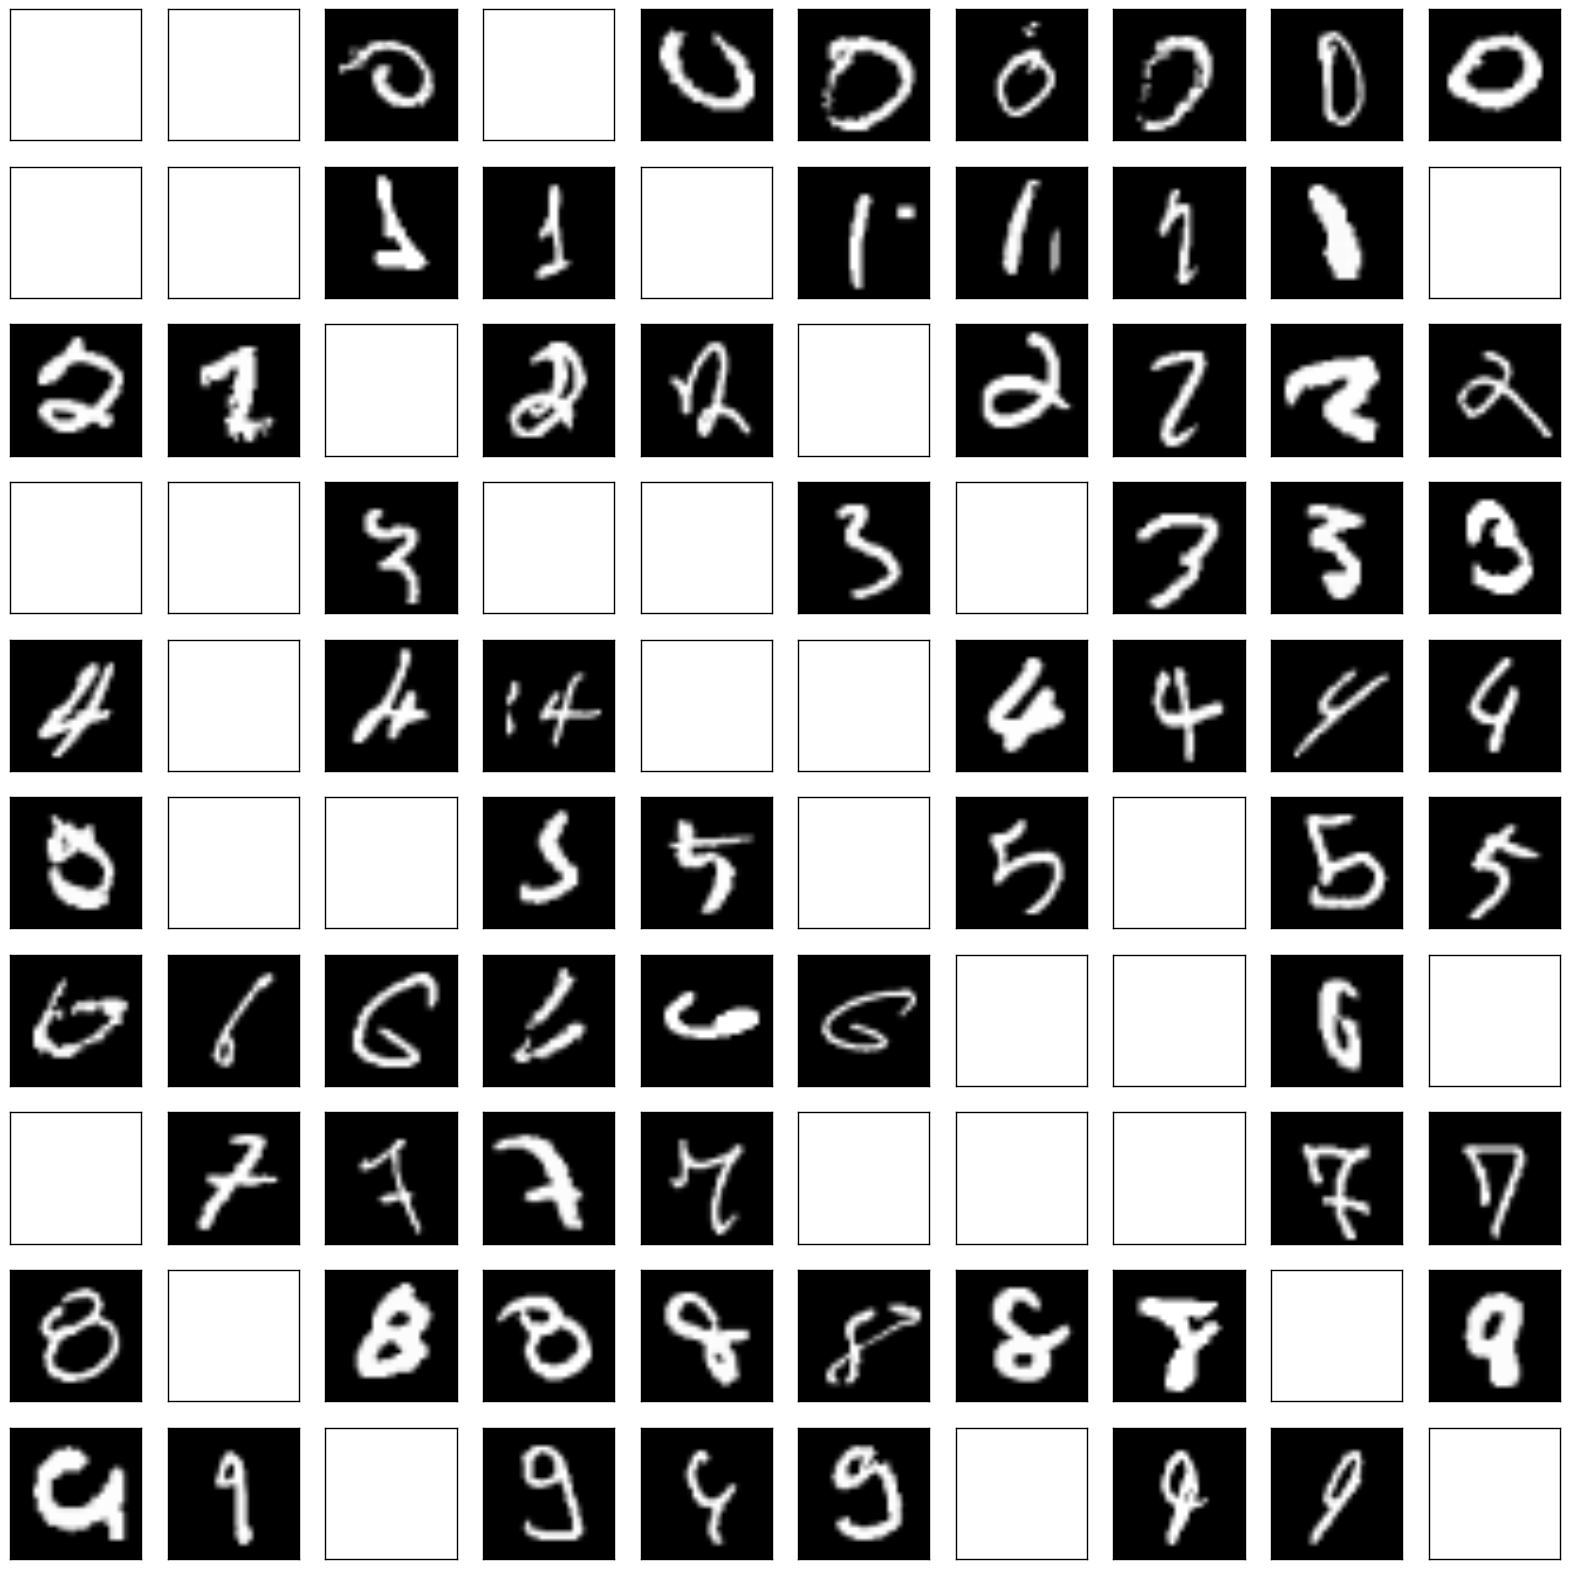

In [7]:
# show the first image in each cell of the error grid
plt.figure(figsize=(20,20))
for y in range(10):
    for x in range(10):
        plt.subplot(10, 10, 1 + (y*10) + x)
        if error_grid[y][x]:
            list_index = error_grid[y][x][0]
            #print("list_index = ",list_index)
            img = X_test[list_index].reshape(28, 28)
            plt.imshow(img, cmap=plt.get_cmap('gray'))
        frame = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
file_helper.save_figure('Prediction-error-examples')
plt.show()

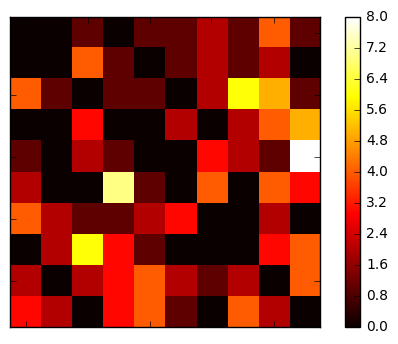

In [8]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# show a heat map of the length of each error list
gridsize = [[len(error_grid[y][x]) for x in range(10)] for y in range(10)]
fig, ax = plt.subplots()
im = plt.imshow(gridsize, cmap='hot', interpolation='nearest')
ax = plt.gca()
ax.set_yticklabels([])
ax.set_xticklabels([])
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.25)
fig.colorbar(im, cax=cax, orientation='vertical')
file_helper.save_figure('Prediction-error-heatmap')
plt.show()